In [49]:
import pandas as pd
import math

def load_gdp_data(fname: str) -> pd.DataFrame:
    world_gdp = pd.read_csv(
        fname, 
        sep=",", 
        header=2,
        index_col="Country Code", 
        #names=["Date", "mkt"], 
        skipinitialspace=True,
        skip_blank_lines=True,
        parse_dates=True,
        infer_datetime_format=True
    ).loc["WLD"].iloc[3:].dropna().astype('float64').reset_index()
    
    world_gdp.loc[:, 'index'] = pd.to_datetime(world_gdp.loc[:, 'index'])
    return world_gdp.set_index('index')

def interpolate_gdp_data(df_gdp : pd.DataFrame) -> pd.DataFrame:
    temp = pd.DataFrame(
        pd.date_range(start=g.index[0], end=g.index[-1], freq='D'),
        columns=["date"]
    )
    temp.loc[:, 'dmy'] = math.nan
    i_gdp = temp.set_index('date').join(df_gdp).drop('dmy', axis=1).interpolate(method = 'akima', axis=0)
    
    return i_gdp

In [50]:
g = load_gdp_data("./API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4251000.csv")
g = interpolate_gdp_data(g)
g

,WLD
date,
1960-01-01,1.392053e+12
1960-01-02,1.392144e+12
1960-01-03,1.392236e+12
1960-01-04,1.392328e+12
1960-01-05,1.392420e+12
...,...
2020-12-28,9.590192e+13
2020-12-29,9.595139e+13
2020-12-30,9.600091e+13


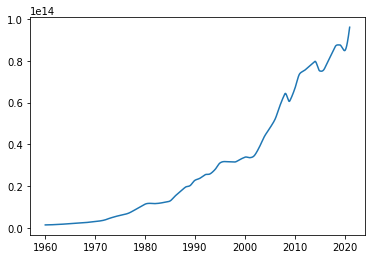

In [51]:
import matplotlib.pyplot as plt
plt.plot(g)